In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as mtp


dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor":"white",
    "figure.edgecolor":"white",
    "axes.facecolor":"white",
    "axes.edgecolor":"orange",
    "xtick.color":"red",
    "ytick.color":"blue",
    "legend.labelcolor":"linecolor"

})

In [ ]:
x=dataset.iloc[:,[3,4]].values


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

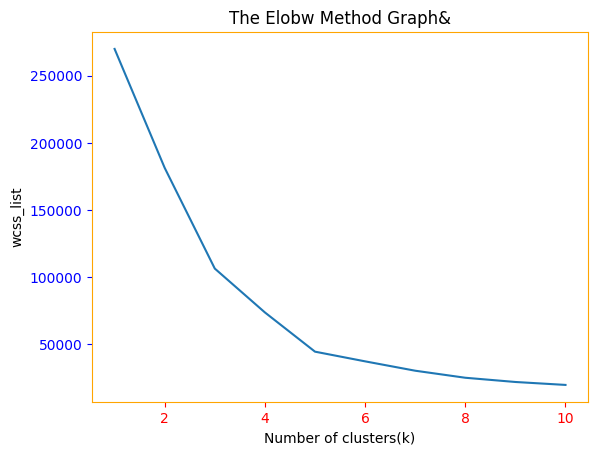

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import  KMeans
wcss_list= []#Initializing the list for the values of WCSS


#Using for loop for iterations from 1 to 10.
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph&')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [ ]:
wcss_list

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state= 42)
y_predict=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


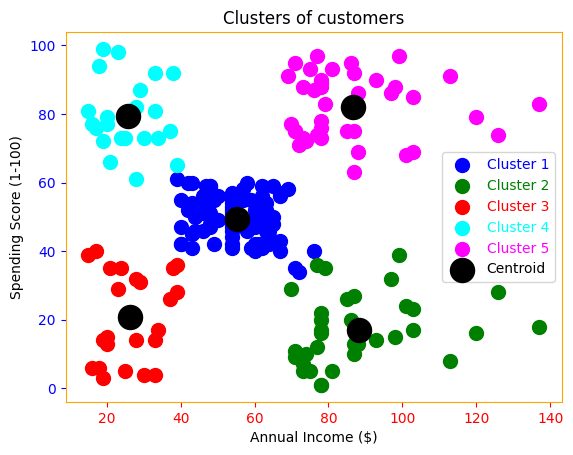

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')  # for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='green', label='Cluster 2')  # for second cluster
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='red', label='Cluster 3')  # for third cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s=100, c='cyan', label='Cluster 4')  # for fourth cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s=100, c='magenta', label='Cluster 5')  # for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
